# Machine Learning-Used Car Price Predictor-Simple

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine,inspect, func
from config import password
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import re
import collections
from collections import Counter
import patsy
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import preprocessing, linear_model, pipeline, metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
% pylab inline

UsageError: Line magic function `%` not found.


In [4]:
con = sqlite3.connect("unnormcleanedcar.sqlite")
df = pd.read_sql_query("SELECT * from unnormalizedcarsdb", con)

In [5]:
df = df[['Price', 'Milage', 'Year', 'Model', 'Car Type']]

In [6]:
df.describe()

,Price,Milage,Year
count,23677.000000,23677.000000,23677.000000
mean,29529.070026,83959.113359,2016.588588
std,17251.225185,63801.946178,3.075055
min,1495.000000,10.000000,1995.000000
25%,16786.000000,37344.000000,2015.000000
50%,25985.000000,69000.000000,2017.000000
75%,38987.000000,116000.000000,2019.000000
max,169800.000000,500000.000000,2021.000000


In [7]:
df.shape

(23677, 5)

#### Created a Dataset X (Indipended Variables) and y (Depended Variable) set for Modeling Linear Regression

In [8]:
sklearn_df=pd.get_dummies(df, columns=['Car Type', 'Model'],drop_first=True)
sklearn_df.head()
df_sk_y=sklearn_df['Price']
df_sk_x=sklearn_df.iloc[:,1:]

#### Split the Data into Test and Train Split using Sklearn

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_sk_x, df_sk_y, test_size=0.3, random_state=100)

#### Fitted the first linear regression model using StatsModels

In [24]:
#OLS MODEL
SM_LinearRegression = sm.OLS(y_train,X_train)
SM_LR_Model=SM_LinearRegression.fit()
SM_LR_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     256.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:29:10   Log-Likelihood:            -1.6650e+05
No. Observations:               16573   AIC:                         3.341e+05
Df Residuals:                   16033   BIC:                         3.383e+05
Df Model:                         539                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Milage                     0.0012      0.001      1.766      0.077      -0.000       0.003
Year                    2432.7231     23.153    105.072      0.000    2387.341    2478.105
Car Type_Alfa          -2.432e+06   2.34e+04   -103.974      0.000   -2.48e+06   -2.39e+06
Car Type_Aston         -2.389e+06   2.33e+04   -102.333      0.000   -2.43e+06   -2.34e+06
Car Type_Audi          -4.649e+06   4.46e+04   -104.174      0.000   -4.74e+06   -4.56e+06
Car Type_BMW           -4.876e+06   4.66e+04   -104.707      0.000   -4.97e+06   -4.78e+06
Car Type_Bentley       -4.021e+06    3.9e+04   -102.978      0.000    -4.1e+06   -3.94e+06
Car Type_Buick         -4.339e+06   4.15e+04   -104.659      0.000   -4.42e+06   -4.26e+06
Car Type_Cadillac       -4.49e+06   4.31e+04   -104.177      0.000   -4.57e+06   -4.41e+06
Car Type_Chevrolet     -4.573e+06   4.38e+04   -104.459      0.000   -4.66e+06   -4.49e+06
Car Type_Chrysler      -4.889e+06   4.82e+04   -101.349      0.000   -4.98e+06   -4.79e+06
Car Type_Dodge          -4.86e+06   4.72e+04   -102.950      0.000   -4.95e+06   -4.77e+06
Car Type_Ferrari       -2.364e+06   2.35e+04   -100.690      0.000   -2.41e+06   -2.32e+06
Car Type_Fiat          -4.074e+06   3.89e+04   -104.708      0.000   -4.15e+06      -4e+06
Car Type_Ford          -4.871e+06   4.69e+04   -103.907      0.000   -4.96e+06   -4.78e+06
Car Type_GMC           -4.575e+06   4.38e+04   -104.397      0.000   -4.66e+06   -4.49e+06
Car Type_Genesis       -3.644e+06   3.51e+04   -103.812      0.000   -3.71e+06   -3.57e+06
Car Type_Honda         -4.552e+06   4.36e+04   -104.513      0.000   -4.64e+06   -4.47e+06
Car Type_Hummer        -3.243e+06    3.1e+04   -104.531      0.000    -3.3e+06   -3.18e+06
Car Type_Hyundai       -4.559e+06   4.36e+04   -104.654      0.000   -4.64e+06   -4.47e+06
Car Type_Infiniti      -4.587e+06   4.39e+04   -104.568      0.000   -4.67e+06    -4.5e+06
Car Type_Jaguar        -4.319e+06   4.15e+04   -104.163      0.000    -4.4e+06   -4.24e+06
Car Type_Jeep           -4.85e+06   4.72e+04   -102.765      0.000   -4.94e+06   -4.76e+06
Car Type_Kia           -4.581e+06   4.38e+04   -104.605      0.000   -4.67e+06   -4.49e+06
Car Type_Lamborghini   -2.374e+06   2.33e+04   -101.971      0.000   -2.42e+06   -2.33e+06
Car Type_Land          -2.427e+06   2.34e+04   -103.920      0.000   -2.47e+06   -2.38e+06
Car Type_Lexus         -4.457e+06   4.28e+04   -104.250      0.000   -4.54e+06   -4.37e+06
Car Type_Lincoln       -4.057e+06   3.89e+04   -104.186      0.000   -4.13e+06   -3.98e+06
Car Type_MINI          -4.883e+06   4.67e+04   -104.520      0.000   -4.97e+06   -4.79e+06
Car Type_Maserati      -3.641e+06    3.5e+04   -104.022      0.000   -3.71e+06   -3.57e+06
Car Type_Mazda          -4.61e+06    4.4e+04   -104.746      0.000    -4.7e+06  

#### Residual Plot (Linear Regression Model)

(array([-30000., -20000., -10000.,      0.,  10000.,  20000.,  30000.,
         40000.]), <a list of 8 Text yticklabel objects>)

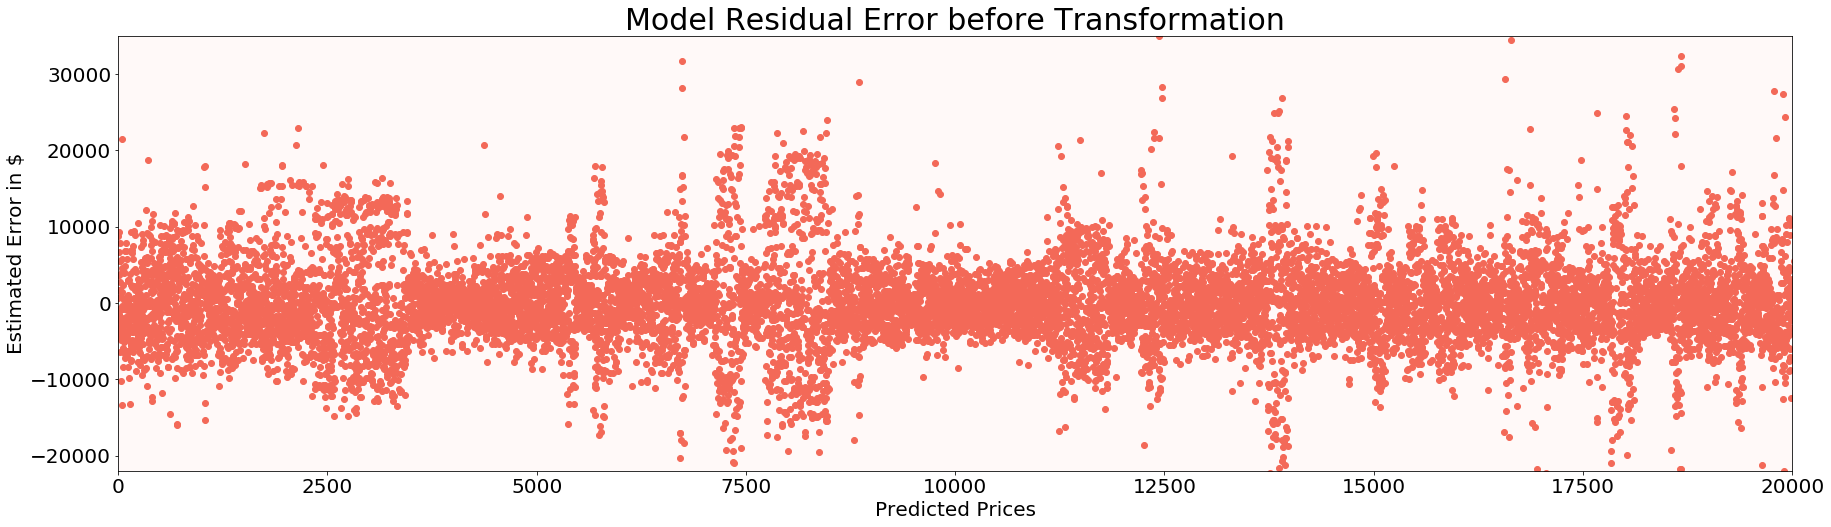

In [25]:
plt.figure(figsize=(15, 4))
plt.subplot(111, facecolor=('#FFF9F8'))
SM_LR_Model.resid.plot(style='o', figsize=(30,8),c=('#F36958'));
plt.title('Model Residual Error before Transformation',fontsize=30)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Predicted Prices',fontsize=20)
plt.ylim(-22000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img2_residualError.jpeg')

#### Sklearn Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8959710049501193

#### Test Score

In [27]:
lr.score(X_test,y_test)

0.8666946599522931

#### Cross-validation K-Fold with Sklearn

#### Declare Kfolds

In [126]:
k_folds = model_selection.KFold(n_splits=10, shuffle=False)

#### Score model with CrossValidated Data and Average the Scores
Model performance is stable.

In [127]:
scores = model_selection.cross_val_score(lr, X_test, y_test, cv=k_folds, scoring='r2')
Avg_Score=np.mean(scores)
Avg_Score
scores

array([ 8.51668985e-01,  8.48112759e-01, -1.41035803e+08,  8.53106911e-01,
        8.58836557e-01,  8.70673878e-01,  8.47504193e-01, -1.42223541e+08,
       -5.18612361e+06,  8.80079147e-01])